In [1]:
# Natural Language Processing

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
# Importing the dataset
# Delimiter will be tabs for tsv file and quoting=3 will ignore all the double quotes
data = pd.read_csv('Reviews.tsv', delimiter = '\t', quoting = 3)
data.shape

(1000, 2)

In [4]:
# Inspecting the data
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
# Importing the NLP libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Cleaning the texts
corpus = []
for i in range(0, 1000):
    # Removing special chars and integers
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    # Creating a list of words from the sentences
    review = review.split()
    ps = PorterStemmer()
    # Removing the stopwords and also stemming all the words to their roots
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    # Corpus will contain all the cleaned review that can be used in the model
    corpus.append(review)

In [7]:
# Equivalent to corpus.head()
corpus[:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [8]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
# Tokenizing the data (one column for each word)
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Logistic Regression

In [10]:
# Logistic Regression

# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

F:\Installed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
# Prediction on test data
y_pred = logreg.predict(X_test)

In [12]:
# Calculating the accuracy, precision and the recall
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_logreg )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100, 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  71.0
Precision :  75.86
Recall :  64.08


In [13]:
# Create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

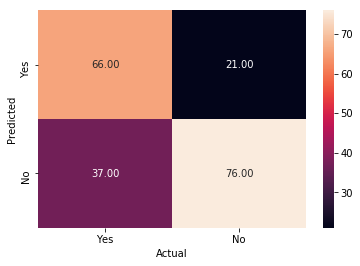

In [14]:
# Confusion matrix 
draw_cm(y_test, y_pred)

In [15]:
# Gaussian Naive Bayes

# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
# Prediction on test set
y_pred = model.predict(X_test)

In [17]:
# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_nb )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100, 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  73.0
Precision :  68.42
Recall :  88.35


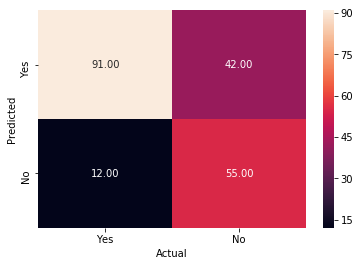

In [18]:
# Confusion matrix 
draw_cm(y_test, y_pred)

## Decision Tree

In [19]:
# Decision Tree Classifier

# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# # Hyperparameter Optimization
# parameters = {'max_features': ['log2', 'sqrt','auto'], 
#               'criterion': ['entropy', 'gini'],
#               'max_depth': [2, 3, 5, 10, 50], 
#               'min_samples_split': [2, 3, 50, 100],
#               'min_samples_leaf': [1, 5, 8, 10]
#              }

# # Run the grid search
# grid_obj = GridSearchCV(clf, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
# Model prediction on train data
y_pred = clf.predict(X_train)

In [21]:
# Prediction on test set
y_pred = clf.predict(X_test)

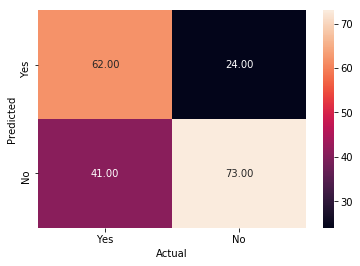

In [22]:
# Confusion matrix
draw_cm(y_test, y_pred)

In [23]:
# Calculating the accuracy, precision and the recall
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_dt )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100, 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  67.5
Precision :  72.09
Recall :  60.19


## Random Forest

In [24]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# # Hyperparameter Optimization
# parameters = {'n_estimators': [4, 6, 9, 10, 15], 
#               'max_features': ['log2', 'sqrt','auto'], 
#               'criterion': ['entropy', 'gini'],
#               'max_depth': [2, 3, 5, 10], 
#               'min_samples_split': [2, 3, 5],
#               'min_samples_leaf': [1, 5, 8]
#              }

# # Run the grid search
# grid_obj = GridSearchCV(rf, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the rf to the best combination of parameters
# rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

F:\Installed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
# Prediction on test data
y_pred = rf.predict(X_test)

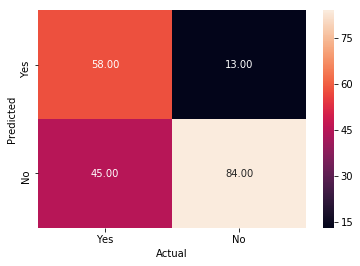

In [26]:
# Confusion metrix
draw_cm(y_test, y_pred)

In [27]:
# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_rf )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100 , 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  71.0
Precision :  81.69
Recall :  56.31


## SVM

In [28]:
# SVM Classifier

# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

F:\Installed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
F:\Installed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
F:\Installed\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
# Import Library of Support Vector Machine model
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

# # Hyperparameter Optimization
# parameters = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
# ]

# # Run the grid search
# grid_obj = GridSearchCV(svc, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the svc to the best combination of parameters
# svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(X_train,y_train)

F:\Installed\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
# Prediction on test data
y_pred = svc.predict(X_test)

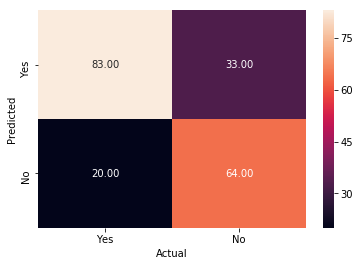

In [31]:
# Confusion Matrix
draw_cm(y_test, y_pred)

In [32]:
# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_svm )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100, 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  73.5
Precision :  71.55
Recall :  80.58


## K - Nearest Neighbors

In [33]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# # Hyperparameter Optimization
# parameters = {'n_neighbors': [3, 4, 5, 10], 
#               'weights': ['uniform', 'distance'],
#               'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#               'leaf_size' : [10, 20, 30, 50]
#              }

# # Run the grid search
# grid_obj = GridSearchCV(knn, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the knn to the best combination of parameters
# knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
# Prediction on test data
y_pred = knn.predict(X_test)

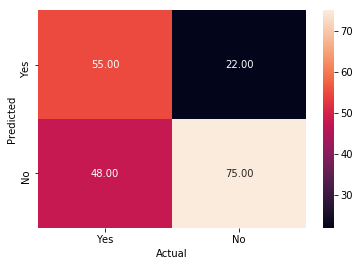

In [35]:
# Confusion Matrix
draw_cm(y_test, y_pred)

In [36]:
# Calculating the accuracy, precision and the recall
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_knn )
print( 'Precision : ', round( metrics.precision_score(y_test, y_pred) * 100, 2 ) )
print( 'Recall : ', round( metrics.recall_score(y_test, y_pred) * 100, 2 ) )

Total Accuracy :  65.0
Precision :  71.43
Recall :  53.4


In [37]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Support Vector Machines,73.5
1,Naive Bayes,73.0
0,Logistic Regression,71.0
3,Random Forest,71.0
2,Decision Tree,67.5
5,K - Nearest Neighbors,65.0
